Note: you may need to restart the kernel to use updated packages.
Series([], dtype: int64)
Note: you may need to restart the kernel to use updated packages.
Number of duplicate rows: 0


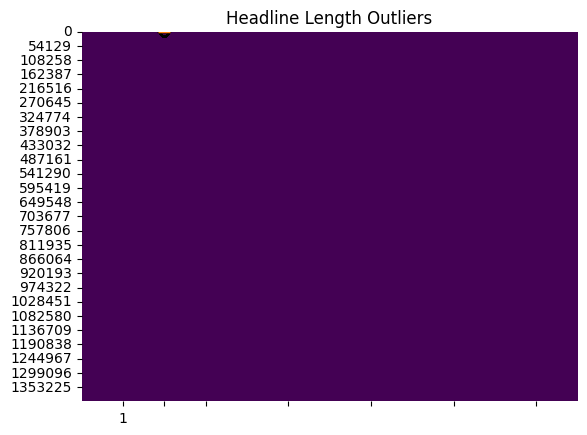

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [11]:
%pip install pandas
import pandas as pd
df = pd.read_csv('data/raw_analyst_ratings.csv')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
%pip install seaborn
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates
df = df.drop_duplicates()
import matplotlib.pyplot as plt
df['headline_length'] = df['headline'].str.len()
plt.boxplot(df['headline_length'].dropna())
plt.title("Headline Length Outliers")
plt.show()
df_cleaned = df.dropna(subset=['headline', 'publisher', 'date'])
df_cleaned.to_csv('data/raw_analyst_ratings_cleaned.csv', index=False)
# Headline length
df=pd.read_csv('data/raw_analyst_ratings_cleaned.csv')
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())
#article per publisher
article_per_publisher = df['publisher'].value_counts()
print(article_per_publisher)
# Plotting article counts per publisher
plt.figure(figsize=(12, 6)) 


In [16]:
df = pd.read_csv('data/raw_analyst_ratings.csv')
article_per_publication_date  = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].head())
invalid_dates = df[df['date'].isnull()]
print(f"Invalid dates found: {len(invalid_dates)}")
counts_by_date = article_per_publication_date.dt.date.value_counts().sort_index()
print(counts_by_date)



0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
Invalid dates found: 0
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [13]:
%pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['headline'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

ModuleNotFoundError: No module named 'sklearn'